In [ ]:
# conda env monte-prob

# 몬테카를로 시뮬레이션으로 배우는 확률 통계 (이산형 분포 샘플링)

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (3,2)

## Uniform 난수 생성 (유사랜덤)

multiplicative congruential generator(MCG)

$x_{i} = (seed * x_{i} + 1)mod(2^{31}-1)$

In [63]:
def pseudo_sample(x0 = 16809,
                  mod = (2**31)-1,
                  seed = 1234567,
                  size = 1):
    res = []
    x = (seed*x0 + 1)%mod
    u = x/mod
    res.append(u)
    for i in range(1, size):
        x = (seed*x + 1)%mod
        u = x/mod
        res.append(u)
    return res

def uniform_cont(low=0, high=1, seed=1234567, size=1):
    s_list = pseudo_sample(seed=seed, size=size)
    res = [low+(high-low)*s for s in s_list]
    return res

def uniform_disc(low=0, high=1, seed=1234567, size=1):
    s_list = pseudo_sample(seed=seed, size=size)
    res = [int(low+(high-low)*s) for s in s_list]
    return res    

uniform_disc(low=0, high=2, size=20)

[1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1]

## Non-uniform 난수 생성 

### 누적 분포의 역함수를 이용해서 지수함수 난수 생성

균일 분포에서 난수를 추출한 후에, 해당 난수를 변형시켜 지수 분포를 따르는 난수 생성

$f(u) = 1, 0 < u < 1$

$f(x) = e^{-x}, x > 0$

$x = -log(1-u)$

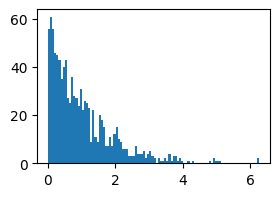

In [64]:
def log(x):
    n = 10000000000.0
    res = n*( (x**(1/n))-1)
    return res

u_list = uniform_cont(low=0, high=1, size=1000)
x_list = [ -log(u) for u in u_list]
plt.hist(x_list, bins=100)
plt.show()

## Acceptance-Rejection 을 이용한 지수함수 난수 생성

$f(x) = e^{-x}, 0 < x < 10$

$g(x) = \frac{1}{10},  0<x, 10$


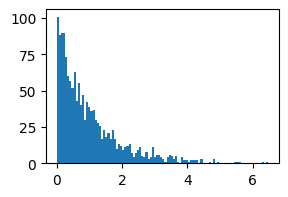

In [66]:
e = 2.7182818284
c = 14

y = uniform_cont(low=0, high=10, seed=12345, size=20000)
u = uniform_cont(low=0, high=1, seed=77777, size=20000)
n = len(y)

x_list = []

for i in range(0, n):
    accept_prob = (e**(-y[i]))/(c*(1/10))
    if u[i] < accept_prob:
        x_list.append(y[i])
        
plt.hist(x_list, bins=100)
plt.show()

## 포아송 분포 난수 생성

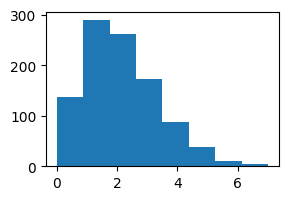

In [78]:
def get_possion_pmf(lamb):
    
    e = 2.7182818284
    x_list = list(range(0,100))
    
    pmf = {}
    for x in x_list:
        prob = ((e**-lamb)*(lamb**x))/factorial(x)
        pmf[x] = prob
        
    return pmf
        
def accept_reject(u_list, pmf):
    res = []
    
    for u in u_list:
        cumul_prob = 0
        for X in pmf.keys():
            cumul_prob += pmf[X]
            if cumul_prob > u:
                res.append(X)
                break
    return res

def draw_dist(pmf, seed=1234567, size=1, bins=15):
    u_list = pseudo_sample(seed=seed, size=size)

    samples = accept_reject(u_list, pmf)
    
    plt.hist(samples, bins=bins)
    plt.show()
    
pmf = get_possion_pmf(lamb=2)
draw_dist(pmf, size=1000, bins=8)

## 지수 분포 난수 생성

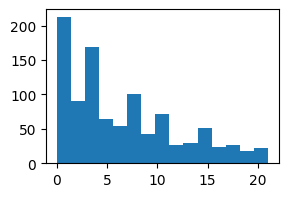

In [86]:
def get_geom_pmf(p=0.5):
    
    e = 2.7182818284
    x_list = list(range(0,100))
    
    pmf = {}
    for x in x_list:
        prob = p*((1-p)**(x-1))
        pmf[x] = prob
        
    return pmf

pmf = get_geom_pmf(p=0.1)
draw_dist(pmf, size=1000, bins=15)

## 음이항 분포 난수 생성

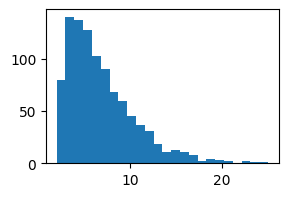

In [90]:
def get_neg_binomial_pmf(r, p=0.5):
    
    x_list = list(range(r,100))
    
    pmf = {}
    for x in x_list:
        prob = combination(x-1, r-1)*(p**r)*((1-p)**(x-r))
        pmf[x] = prob
        
    return pmf

pmf = get_neg_binomial_pmf(r=2, p=0.3)
draw_dist(pmf, size=1000, bins=24)